# SIS toy model

***

In [1]:
import requests
import random
import networkx as nx
import matplotlib.pyplot as plt

***

## Exercise 20.3 from SNA

Implement an SIS model on the networks at `http://www.networkatlas.eu/exercises/20/1/data.txt` and `http://www.networkatlas.eu/exercises/20/2/data.txt`. 
Run it multiple times with $\beta=0.2$ and different $\mu$ values: 0.05, 0.1, and 0.2. Find an endemic state!

In [3]:
# define parameters
beta = 0.2
mus = [0.05, 0.1, 0.2]

def run_SIS(nw, beta=0.2, maxtime=100, seed=1312, M=10):
    '''nw is one of: 1 (power law), 2 (Gnp)'''

    # make network
    url = f"https://www.networkatlas.eu/exercises/20/{nw}/data.txt"
    data = requests.get(url).text
    data = data.split("\n")
    data = data[:-1]
    edgelist = [[int(x) for x in edge.split("\t")] for edge in data]
    nodelist = list(set([node for edge in edgelist for node in edge]))

    G_orig = nx.Graph()
    G_orig.add_edges_from(edgelist)

    assert len([c for c in nx.connected_components(G_orig)]) == 1 , "More than 1 component!"
    assert all([edge==sorted(edge) for edge in edgelist]), "Edges in different directions!"

    # initiate dictionary of node neighbours
    d = {}
    for edge in edgelist:
        for node in edge:
            if not node in d:
                d[node] = []
        d[edge[0]].append(edge[1])
        d[edge[1]].append(edge[0])
    # now d contains key: value pairs; key = node id, value = list of node's neighbours

    # set parameters
    N = len(nodelist)
    random.seed(seed)

    # manual implementation
    res = {}

    for mu in mus:

        # initiate dictionary keeping track of runs
        runs = {}

        for run in range(M):

            # start clock
            time = 0
            infected = []
            ratios = []
            neighbours = []

            # at t0, 
            # infect patient zero
            patient_zero = random.choice(list(d.keys()))
            
            # update neighbours, infected, and ratios
            infected.append(patient_zero)
            ratios.append(1/N)

            time += 1

            # at each timestep,
            while time < maxtime:

                # recover - with parameter mu
                recovered = []
                for node in infected:
                    if random.uniform(0,1) < mu:
                        recovered.append(node)
                infected = list(set(infected).difference(set(recovered)))

                # infect - with parameter beta
                new_infections = []

                # for each node, check number of infected neighbours
                for node in nodelist:
                    nin = len(
                        set(d[node]).intersection(set(infected))
                    )
                    if nin:
                        if random.uniform(0,1) < beta * nin:
                            new_infections.append(node)
                # add infected at timestep t
                if new_infections:
                    infected += new_infections
                    infected = list(set(infected)) #... and deduplify

                ratio = round(len(set(infected)) / N, 6)
                ratios.append(ratio)


                if len(set(infected))==N:
                    print(f"b={beta}, run={run} All nodes infected at timestep {time}")
                    break
                elif len(set(infected))==0:
                    print(f"b={beta}, run={run} All nodes recovered at timestep {time}")
                    break
                else:
                    pass

                time +=1

            runs[run] = ratios.copy() # save ratios as result in runs dict
            print(f"Run = {run}, mu = {mu}, steps = {time}")

            del time, infected, ratios, neighbours

        res[mu] = runs.copy()
    
    return res


In [4]:
res1 = run_SIS(1)

Run = 0, mu = 0.05, steps = 100
Run = 1, mu = 0.05, steps = 100
b=0.2, run=2 All nodes recovered at timestep 1
Run = 2, mu = 0.05, steps = 1
Run = 3, mu = 0.05, steps = 100
b=0.2, run=4 All nodes recovered at timestep 8
Run = 4, mu = 0.05, steps = 8
Run = 5, mu = 0.05, steps = 100
b=0.2, run=6 All nodes recovered at timestep 1
Run = 6, mu = 0.05, steps = 1
Run = 7, mu = 0.05, steps = 100
Run = 8, mu = 0.05, steps = 100
Run = 9, mu = 0.05, steps = 100
b=0.2, run=0 All nodes recovered at timestep 2
Run = 0, mu = 0.1, steps = 2
Run = 1, mu = 0.1, steps = 100
Run = 2, mu = 0.1, steps = 100
b=0.2, run=3 All nodes recovered at timestep 2
Run = 3, mu = 0.1, steps = 2
Run = 4, mu = 0.1, steps = 100
b=0.2, run=5 All nodes recovered at timestep 6
Run = 5, mu = 0.1, steps = 6
Run = 6, mu = 0.1, steps = 100
Run = 7, mu = 0.1, steps = 100
Run = 8, mu = 0.1, steps = 100
Run = 9, mu = 0.1, steps = 100
Run = 0, mu = 0.2, steps = 100
b=0.2, run=1 All nodes recovered at timestep 7
Run = 1, mu = 0.2, ste

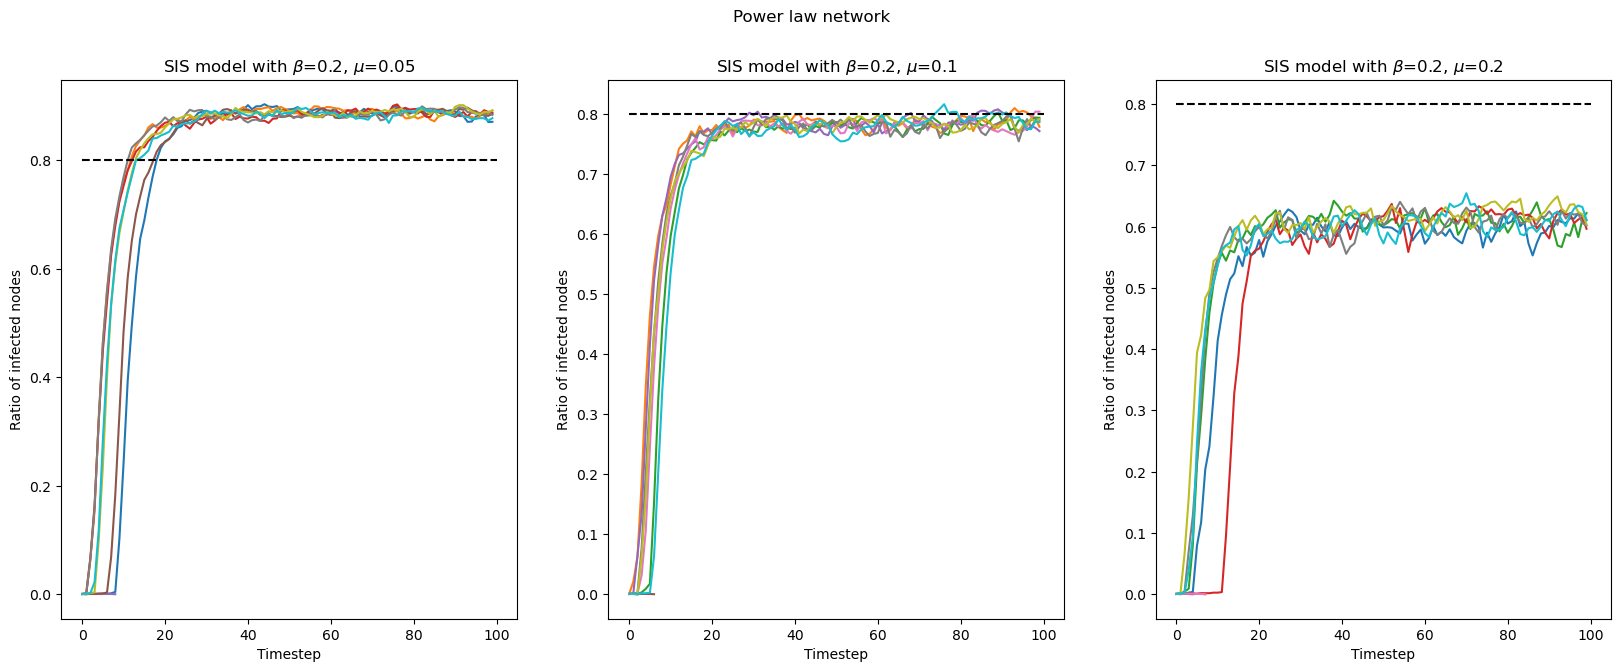

In [6]:
fig, axs = plt.subplots(1,3, figsize=(20,7))

for i in range(3):

    mu = mus[i]
    ax = axs[i]

    for k, v in res1[mu].items():
        ax.plot(v, label = k)
    ax.hlines(xmin=0, xmax=100,y=0.8, linestyle="dashed", color = "black")
    #ax.legend()
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Ratio of infected nodes")
    ax.set_title(f"SIS model with $\\beta$={beta}, $\\mu$={mu}")

plt.suptitle("Power law network")

plt.show()

In [7]:
res2 = run_SIS(2)

Run = 0, mu = 0.05, steps = 100
Run = 1, mu = 0.05, steps = 100
b=0.2, run=2 All nodes recovered at timestep 5
Run = 2, mu = 0.05, steps = 5
Run = 3, mu = 0.05, steps = 100
Run = 4, mu = 0.05, steps = 100
Run = 5, mu = 0.05, steps = 100
Run = 6, mu = 0.05, steps = 100
Run = 7, mu = 0.05, steps = 100
Run = 8, mu = 0.05, steps = 100
b=0.2, run=9 All nodes recovered at timestep 2
Run = 9, mu = 0.05, steps = 2
Run = 0, mu = 0.1, steps = 100
Run = 1, mu = 0.1, steps = 100
b=0.2, run=2 All nodes recovered at timestep 1
Run = 2, mu = 0.1, steps = 1
b=0.2, run=3 All nodes recovered at timestep 4
Run = 3, mu = 0.1, steps = 4
Run = 4, mu = 0.1, steps = 100
Run = 5, mu = 0.1, steps = 100
b=0.2, run=6 All nodes recovered at timestep 4
Run = 6, mu = 0.1, steps = 4
Run = 7, mu = 0.1, steps = 100
Run = 8, mu = 0.1, steps = 100
Run = 9, mu = 0.1, steps = 100
Run = 0, mu = 0.2, steps = 100
Run = 1, mu = 0.2, steps = 100
Run = 2, mu = 0.2, steps = 100
Run = 3, mu = 0.2, steps = 100
b=0.2, run=4 All node

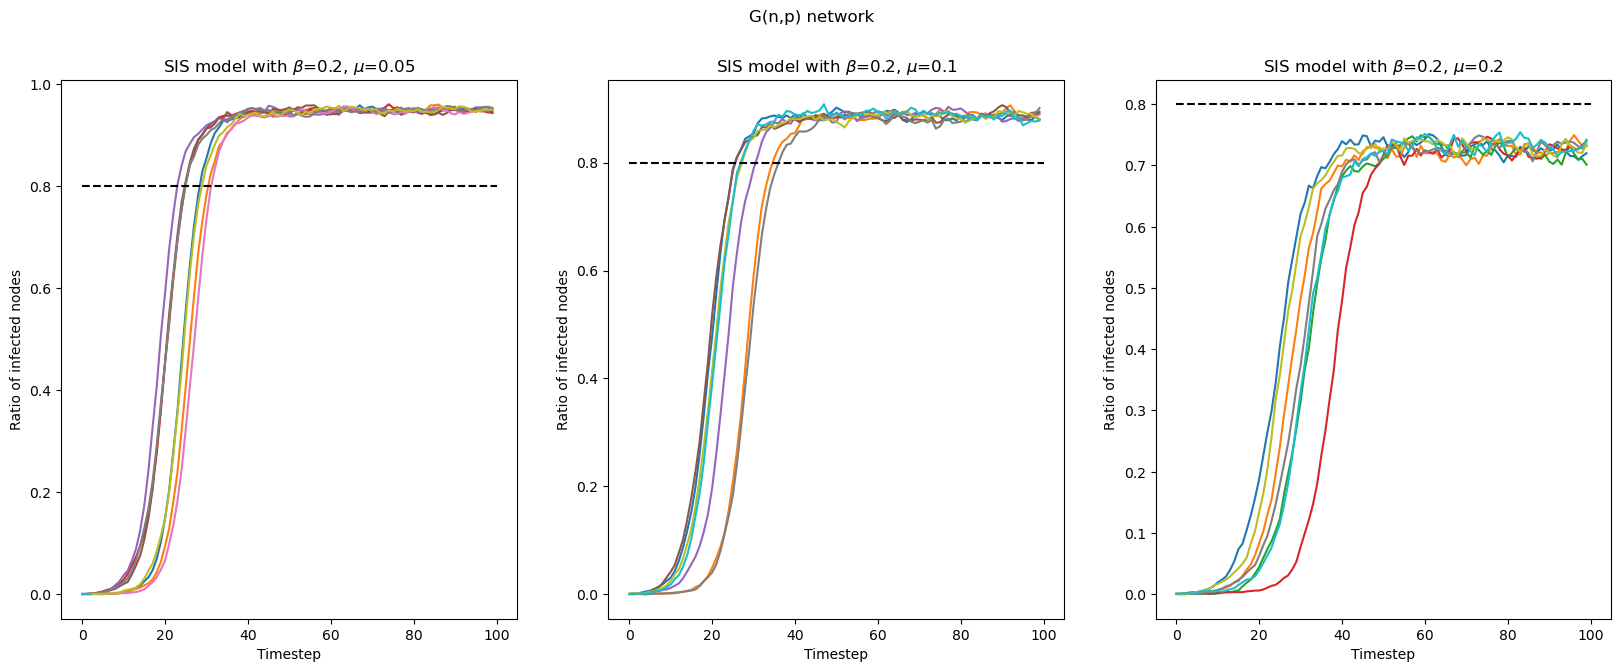

In [8]:
fig, axs = plt.subplots(1,3, figsize=(20,7))

for i in range(3):

    mu = mus[i]
    ax = axs[i]

    for k, v in res2[mu].items():
        ax.plot(v, label = k)
    ax.hlines(xmin=0, xmax=100,y=0.8, linestyle="dashed", color = "black")
    #ax.legend()
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Ratio of infected nodes")
    ax.set_title(f"SIS model with $\\beta$={beta}, $\\mu$={mu}")

plt.suptitle("G(n,p) network")

plt.show()

Will the disease be endemic?

In [40]:
k = 3.527
thresh = 1 / (k+1)
beta = 0.025
print(f"threshold for lambda: {thresh}")
for mu in mus:
    l = beta / mu
    print(beta, mu, l)

threshold for lambda: 0.2208968411751712
0.025 0.05 0.5
0.025 0.1 0.25
0.025 0.2 0.125


In [41]:
beta = 0.025
res3 = run_SIS(1, beta = beta)

b=0.025, run=0 All nodes recovered at timestep 15
Run = 0, mu = 0.05, steps = 15
b=0.025, run=1 All nodes recovered at timestep 37
Run = 1, mu = 0.05, steps = 37
Run = 2, mu = 0.05, steps = 100
b=0.025, run=3 All nodes recovered at timestep 4
Run = 3, mu = 0.05, steps = 4
Run = 4, mu = 0.05, steps = 100
Run = 5, mu = 0.05, steps = 100
Run = 6, mu = 0.05, steps = 100
Run = 7, mu = 0.05, steps = 100
b=0.025, run=8 All nodes recovered at timestep 12
Run = 8, mu = 0.05, steps = 12
Run = 9, mu = 0.05, steps = 100
b=0.025, run=0 All nodes recovered at timestep 8
Run = 0, mu = 0.1, steps = 8
b=0.025, run=1 All nodes recovered at timestep 4
Run = 1, mu = 0.1, steps = 4
b=0.025, run=2 All nodes recovered at timestep 1
Run = 2, mu = 0.1, steps = 1
b=0.025, run=3 All nodes recovered at timestep 2
Run = 3, mu = 0.1, steps = 2
b=0.025, run=4 All nodes recovered at timestep 13
Run = 4, mu = 0.1, steps = 13
b=0.025, run=5 All nodes recovered at timestep 10
Run = 5, mu = 0.1, steps = 10
Run = 6, mu = 

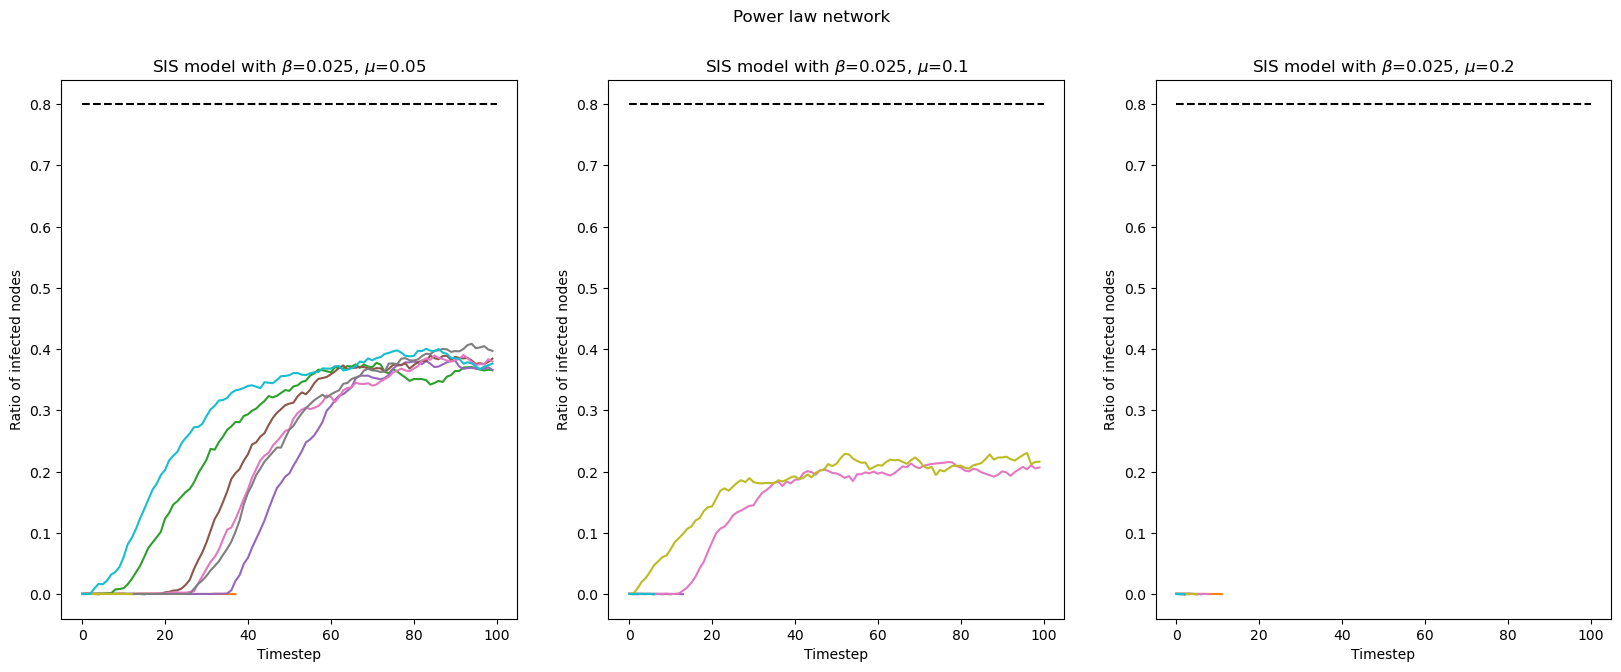

In [42]:
fig, axs = plt.subplots(1,3, figsize=(20,7))

for i in range(3):

    mu = mus[i]
    ax = axs[i]

    for k, v in res3[mu].items():
        ax.plot(v, label = k)
    ax.hlines(xmin=0, xmax=100,y=0.8, linestyle="dashed", color = "black")
    #ax.legend()
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Ratio of infected nodes")
    ax.set_title(f"SIS model with $\\beta$={beta}, $\\mu$={mu}")

plt.suptitle("Power law network")

plt.show()